In [42]:
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector as cnt

from manoFunkcijos import *

In [43]:
#prisijungimas prie mySQL, ir kursoriaus sukūrimas
DB = cnt.connect(
    host = '88.223.121.130',
    user='user',
    password='slaptazodis',
    port=3306,
    database='works'
    )
C=DB.cursor()

In [3]:
sql="""select * from BrentOilPrices;"""
C.execute(sql)
ans = C.fetchall()
date, price = list(map(list, zip(*ans)))
#? = np.transpose(ans)



Rodoma 5 eilutės iš 8360
| 0 |   20-May-87    |     18.63      |
| 1 |   21-May-87    |     18.45      |
| 2 |   22-May-87    |     18.55      |
| 3 |   25-May-87    |      18.6      |
| 4 |   26-May-87    |     18.63      |


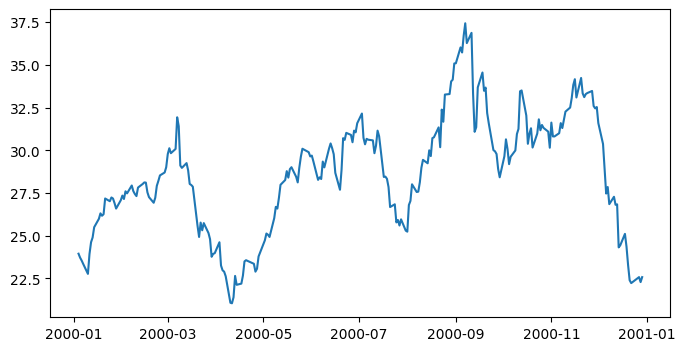

In [34]:
from dateutil import parser

date1=[]
for i in date:
    date1.append(parser.parse(i))

nuo = input('iveskite nuo kuriu metu norite matyti duomenis')
nuo1=parser.parse(nuo)
iki = input('iveskite iki kuriu metu norite matyti duomenis')
iki1=parser.parse(iki)

date2=[]
price2=[]

for i in range(0, len(date1)):
    if date1[i].year >= nuo1.year and date1[i].year <= iki1.year:
        date2.append(date1[i])
        price2.append(price[i])

fig, axis = plt.subplots( figsize=(8,4))
axis.plot(date2, price2)
plt.show()

In [30]:
from dateutil import parser

a=parser.parse('2005,06,12')
print(a)
a=a.year
print(a)

2005-12-22 00:00:00
2005


In [35]:
sql="""SELECT substring(dataLaikas, 6, 2) as menuo, count(*) as kiekis FROM works.EismIvyk2021
group by menuo
order by menuo;"""
C.execute(sql)
ans = C.fetchall()
menuo, kiekis = list(map(list, zip(*ans)))
#? = np.transpose(ans)

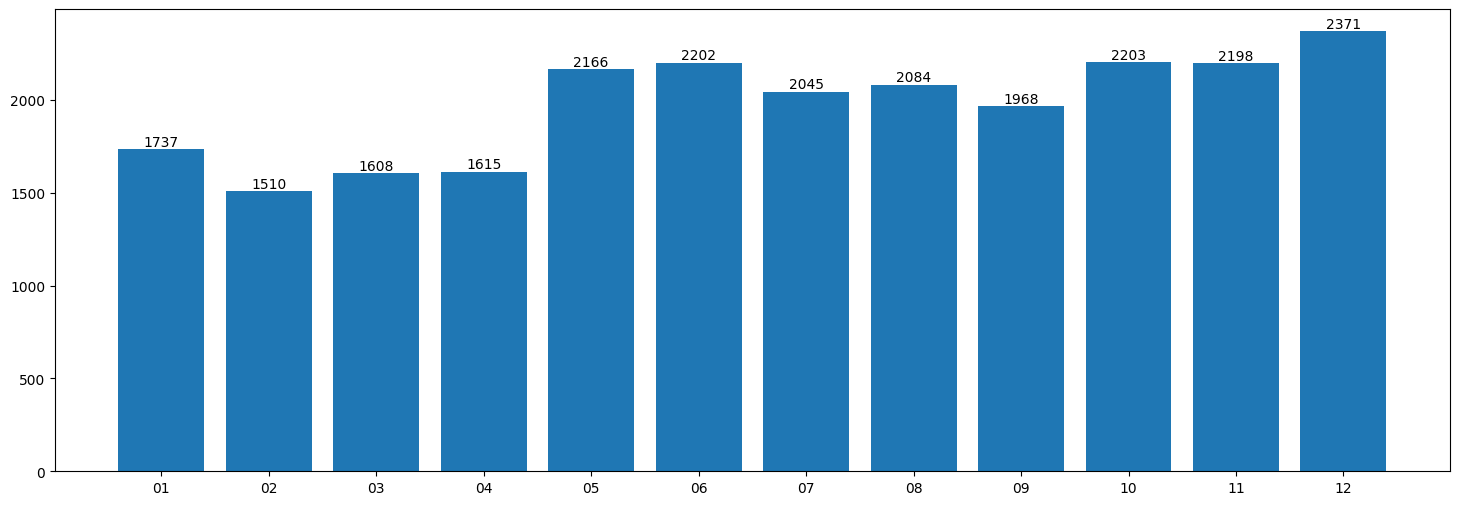

In [36]:
fig, axis = plt.subplots( figsize=(18, 6))

a=axis.bar(menuo, kiekis)
axis.bar_label(a)

plt.show()

In [37]:
sql="""SELECT substring(dataLaikas, 12, 2) as valandos, count(*) as kiekis FROM works.EismIvyk2021
group by valandos
order by valandos;"""
C.execute(sql)
ans = C.fetchall()
valandos, kiekis = list(map(list, zip(*ans)))
#? = np.transpose(ans)

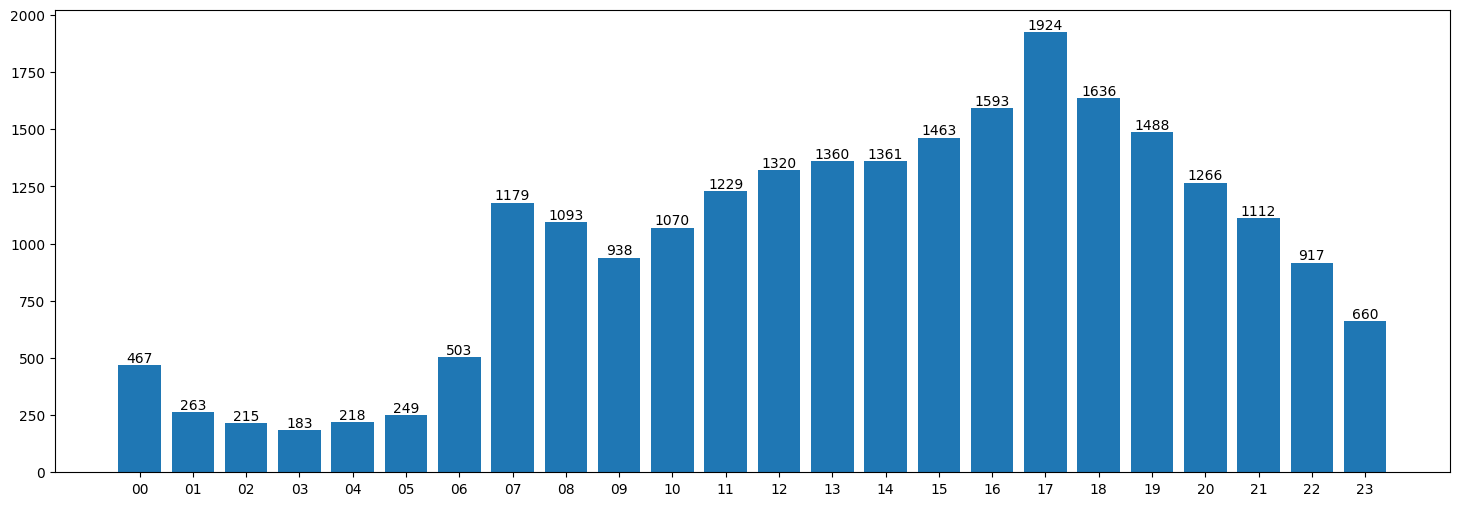

In [38]:
fig, axis = plt.subplots( figsize=(18, 6))

a=axis.bar(valandos, kiekis)
axis.bar_label(a)

plt.show()

In [39]:
sql="""select ivykioVieta, kiekis, (kiekis/(select count(*) from EismIvyk2021))*100 as proc, viso
from 
(select ivykioVieta, count(*) as kiekis from EismIvyk2021
group by ivykioVieta
order by kiekis desc
limit 5) as T1
cross join
(select count(*) as viso from EismIvyk2021) as T2;"""
C.execute(sql)
ans = C.fetchall()
vieta, kiekis, proc, viso = list(map(list, zip(*ans)))
#? = np.transpose(ans)

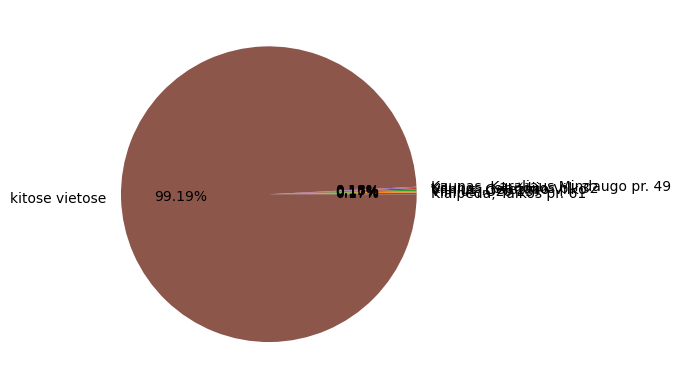

In [40]:
vieta.append('kitose vietose')
z=100
for i in proc:
    z=z-i
proc.append(z)
fig, axis = plt.subplots()

axis.pie(proc, labels = vieta, autopct='%.2f%%')
plt.show()

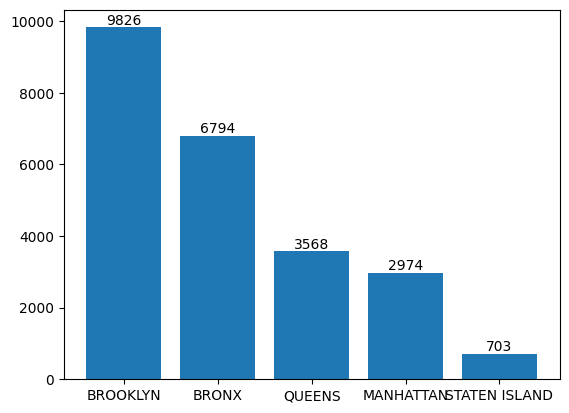

In [45]:
sql="""select BORO, count(*) as kiekis
from nypd
group by BORO
order by kiekis desc;"""
C.execute(sql)
ans = C.fetchall()
rajonas, kiekis = list(map(list, zip(*ans)))
#? = np.transpose(ans)

fig, axis = plt.subplots()

a=axis.bar(rajonas, kiekis)
axis.bar_label(a)

plt.show()

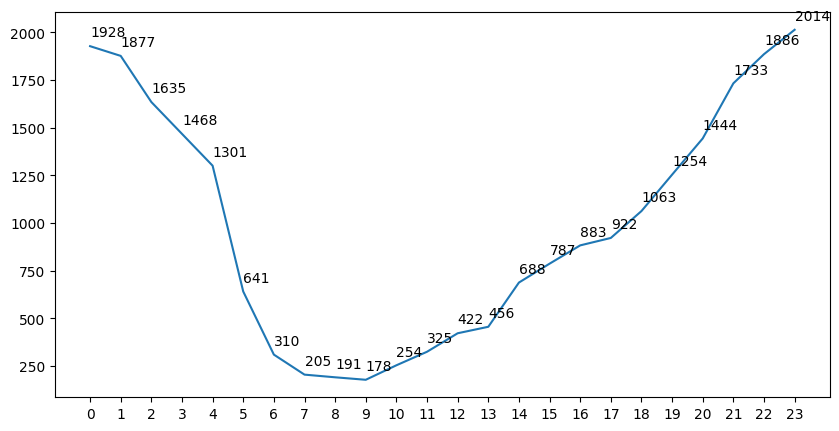

In [54]:
sql="""select hour(OCCUR_TIME) as valanda, count(*) as kiekis
from nypd
group by valanda
order by valanda asc;"""
C.execute(sql)
ans = C.fetchall()
valanda, kiekis = list(map(list, zip(*ans)))
#? = np.transpose(ans)

fig, axis = plt.subplots(figsize=(10, 5))

axis.plot(valanda, kiekis)

for i in range(0, len(valanda)):
    axis.text(valanda[i], kiekis[i]+50, kiekis[i])
    
axis.set_xticks(valanda)
plt.show()

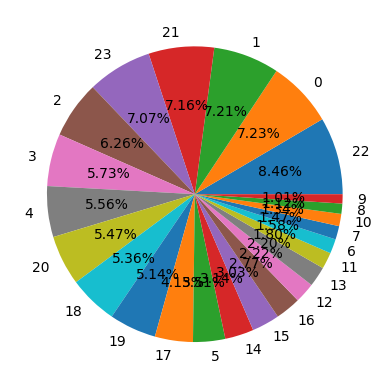

In [50]:
sql="""select hour(OCCUR_TIME) as valanda, count(*) as kiekis
from nypd
where STATISTICAL_MURDER_FLAG ='1'
group by valanda
order by kiekis desc;"""
C.execute(sql)
ans = C.fetchall()
valanda, kiekis = list(map(list, zip(*ans)))

fig, axis = plt.subplots()

axis.pie(kiekis, labels = valanda, autopct='%.2f%%')
plt.show()